In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
# from Linear_Regression_Pytorch import Linear_Regression

Bài 1:

Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:

* Lr = 0.2



In [2]:
def function(lr= 0.2):
    x = torch.tensor([2.], requires_grad= True)
    x_list = []
    y_list = []

    for i in range(10):
        x_list.append(x.item())
        # x_list.append(x)        
        f = x ** 2
        y_list.append(f.item())
        
        # calculate derivative
        f.backward()
        with torch.no_grad():
            x -= lr * x.grad 
            x.grad.zero_() 
    return x_list, y_list

print(function()) 

([2.0, 1.2000000476837158, 0.7200000286102295, 0.4320000112056732, 0.25920000672340393, 0.1555199921131134, 0.09331199526786804, 0.055987197905778885, 0.03359232097864151, 0.020155392587184906], [4.0, 1.440000057220459, 0.5184000134468079, 0.18662400543689728, 0.06718464195728302, 0.02418646775186062, 0.008707128465175629, 0.0031345663592219353, 0.0011284439824521542, 0.00040623985114507377])


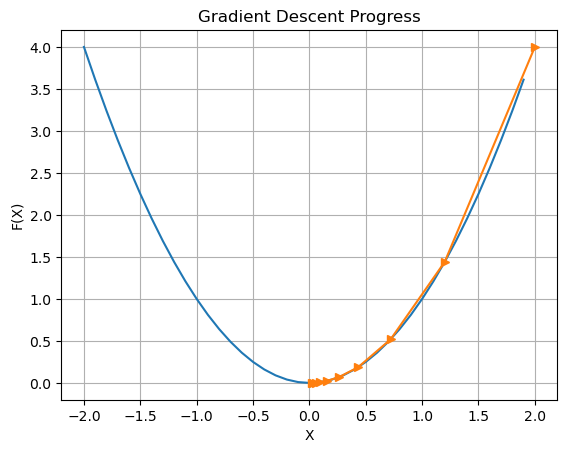

In [3]:
a = np.arange(-2, 2, 0.1)
b = a**2
plt.plot(a,b)

x_values, y_values = function()
# Create a line plot
plt.plot(x_values, y_values, marker='>', linestyle='-')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.title('Gradient Descent Progress')
plt.grid(True)

plt.show()


* Lr = 2

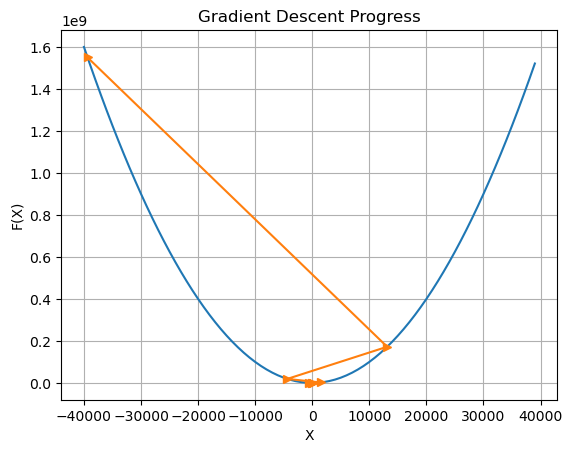

In [4]:
a = np.arange(-40000, 40000, 1000)
b = a**2
plt.plot(a,b)

x_values, y_values = function(lr= 2)
# Create a line plot
plt.plot(x_values, y_values, marker='>', linestyle='-')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.title('Gradient Descent Progress')
plt.grid(True)

plt.show()

Bài 2: 
Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) Dựa vào code mẫu hãy

In [5]:
df = pd.read_csv("data_linear.csv")
Y = df["Giá"]
X = df.drop("Giá", axis= 1)
df

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


In [6]:
X_train = torch.from_numpy(df['Diện tích'].values.reshape(-1, 1))
Y_train = torch.from_numpy(df['Giá'].values.reshape(-1, 1))

* Implement thuật toán linear regression với dữ liệu trên

In [7]:
class Linear_Regression():
    def __init__(self, num_features):
        self.num_features = num_features
        self.w = torch.randn(self.num_features, 1, requires_grad = True, dtype= torch.float64)
        self.b = torch.randn( 1, requires_grad = True, dtype= torch.float64)

    def fit(self, x, y, num_epochs= 100,  lr= 0.0001):
        self.losses = []
        for i in range(num_epochs):
            y_hat = self.predict(x)

            loss = torch.mean((y_hat - y) ** 2)

            loss.backward()
            # Adjust weights & reset gradients
            self.losses.append(loss.item())

            with torch.no_grad():
                self.w -= lr * self.w.grad 
                self.b -= lr * self.b.grad 

                self.w.grad.zero_()
                self.b.grad.zero_()

            if (i + 1) % 10 == 0:
                print(f'epoch {i + 1}: loss = {loss.item():.2f}')

    def loss(self):
        return self.losses

    def predict(self, x):
        return x @ self.w.t() + self.b

* Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng

epoch 10: loss = 43672980472264600322048.00
epoch 20: loss = 111606533195685087510648262267279673131008.00
epoch 30: loss = 285211087433567887279762793105454855806055553409034531897344.00
epoch 40: loss = 728858446417392613639530389952229305076126420795282460337151340318350488109056.00
epoch 50: loss = 1862601624972634472543067368897059309039194248441865494819341739765023666160758551917480724398080.00
epoch 60: loss = 4759888330036522669994900154232876325737948115730866556719235027160270282040195997363762071048648703101030931365888.00
epoch 70: loss = 12163919869204856699526488248537011411446485104788202658597841302175680626804483321538145844441177117570085144862261897092613533597696.00
epoch 80: loss = 31084961731297968115732668213245446864929777126775873970446794867512477432931238395515799667474925511499942480339967279587679851370411907415015860207616.00
epoch 90: loss = 794377845485938177716751817936137708442826715530047996786202647132499461939309969074702430693022939930365570275666

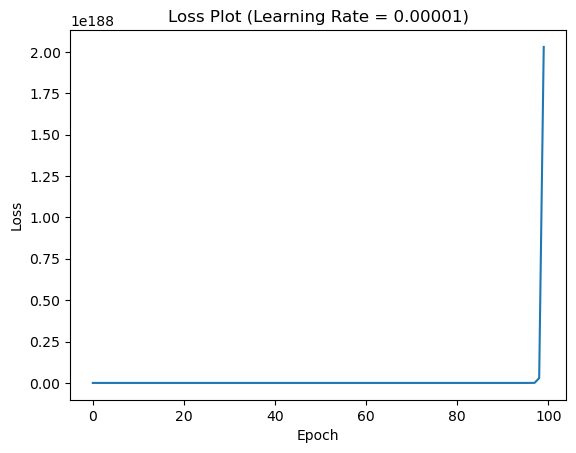

In [8]:
model = Linear_Regression(X_train.size(1))
model.fit(X_train, Y_train, lr= 0.001)
losses = model.loss()

# Plot the loss values over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Plot (Learning Rate = 0.00001)')
plt.show()

epoch 10: loss = 252.55
epoch 20: loss = 252.55
epoch 30: loss = 252.55
epoch 40: loss = 252.55
epoch 50: loss = 252.55
epoch 60: loss = 252.54
epoch 70: loss = 252.54
epoch 80: loss = 252.54
epoch 90: loss = 252.54
epoch 100: loss = 252.53


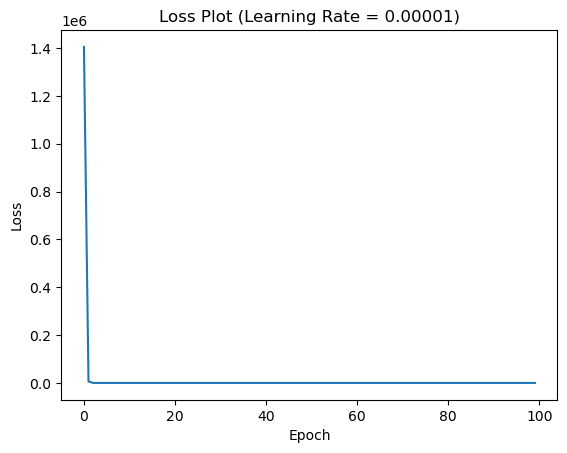

In [9]:
model = Linear_Regression(X_train.size(1))
model.fit(X_train, Y_train, lr= 0.0001)
losses = model.loss()

# Plot the loss values over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Plot (Learning Rate = 0.00001)')
plt.show()

epoch 10: loss = 166273.46
epoch 20: loss = 23690.07
epoch 30: loss = 3560.28
epoch 40: loss = 718.37
epoch 50: loss = 317.15
epoch 60: loss = 260.51
epoch 70: loss = 252.51
epoch 80: loss = 251.38
epoch 90: loss = 251.22
epoch 100: loss = 251.20


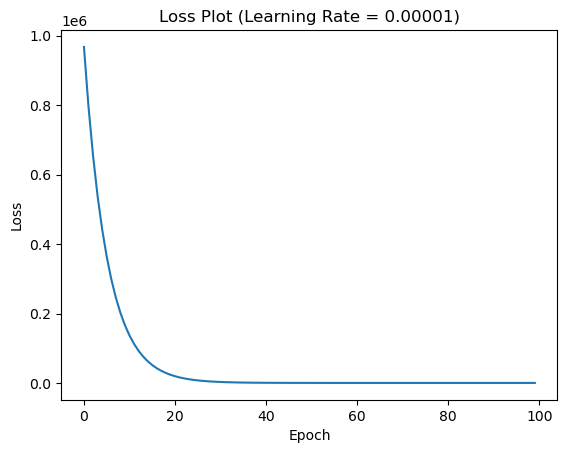

In [10]:
model = Linear_Regression(X_train.size(1))
model.fit(X_train, Y_train, lr= 0.00001)
losses = model.loss()

# Plot the loss values over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Plot (Learning Rate = 0.00001)')
plt.show()

* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [12]:
def MSE(yhat, y):
    return torch.mean((yhat - y) ** 2).item()

def RMSE(yhat, y):
    return torch.sqrt(torch.mean((yhat - y) ** 2)).item()

def MAE(yhat, y):
    return torch.mean(torch.abs(yhat - y) ** 2).item()

def MAPE(yhat, y):
    return torch.mean(torch.abs((yhat - y) / y)).item() * 100

In [13]:
print("MSE: {:.2f}".format(MSE(model.predict(X_train), y_train)))
print("RMSE: {:.2f}".format(RMSE(model.predict(X_train), y_train)))
print("MAE: {:.2f}".format(MAE(model.predict(X_train), y_train)))
print("MAPE: {:.2f}%".format(MAPE(model.predict(X_train), y_train)))

MSE: 246.87
RMSE: 15.71
MAE: 246.87
MAPE: 1.56%
